In [1]:
data = """30 14-11-2003
10 15-03-2004
12 04-12-2012
33 09-05-2007
44 16-08-2005
55 25-07-2001
76 31-12-2011
87 25-06-2009
118 16-02-2006
119 10-02-2000
145 03-05-2014"""

In [2]:
import datetime

yvalues = []
xdates = []
for line in data.split("\n"):
    x, y = line.split()
    yvalues.append(int(x))
    xdates.append(datetime.datetime.strptime(y, "%d-%m-%Y").date())

<Figure size 640x480 with 0 Axes>

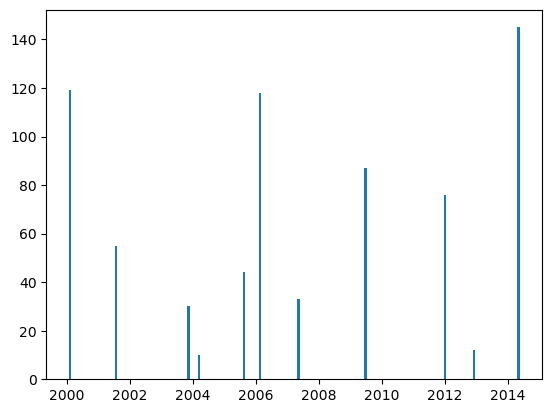

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(xdates, yvalues, width=30)
plt.show()

## 정규분포


In [13]:
import numpy as np
x=np.random.randn(100)

In [14]:
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

mean	: 0.0392901122595306
median	: -0.06977879970273013


In [15]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))#분포의 대칭성을 설명하는 지표

skewness	: 0.4604268815158929


In [19]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))#뾰족한 정도

kurtosis	: 0.004896122417523685


In [20]:

import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [21]:
import pandas as pd
xPd=pd.DataFrame(x, columns=['x'], dtype=float)

In [22]:
df=spark.createDataFrame(xPd)

In [23]:
from pyspark.sql import functions as f
df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

+------------------+--------------------+
|       skewness(x)|         kurtosis(x)|
+------------------+--------------------+
|0.4604268815158927|0.004896122417524129|
+------------------+--------------------+



In [25]:
#평균
X=x
print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X)))

simple mean of x = 0.039


In [26]:
import numpy as np

xbar=np.mean(X)

In [27]:
print ("numpy mean of X = {:.3f}".format(xbar))

numpy mean of X = 0.039


## 분산 계산식
분산 variance나 표준편차 Standard Deviation은 평균으로부터 얼마나 멀리 떨어져 또는 흩어져 분포하는지 알려주는 값이다.

분산은 평균에서 관측값을 뺀 차이값을 제곱하여 평균을 계산한다. 제곱을 하지 않고 차이값을 더하면 0이 나오므로 제곱을 한다.
* 분산을 제곱근하면 표준편차가 된다.
* 분산보다는 표준편차가 더 자주 사용된다.

수식으로 분산을 계산을 해보자.

In [29]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

0.9312614535231819



n-1 보정을 해주어서 분산을 계산하면 다음과 같이 미세하게 값이 증가한다. 이러한 보정은 샘플의 크기가 커지면 영향이 더욱 적어지게 된다.

n-1 보정을 해주어야 하는 이유는 하나는 제외해도 되기 때문이다. 분산을 계산하려면 평균을 알아야 한다. 분산이란 평균에서 얼마나 떨어져 있는지 나타내는 값이기 때문이다. 모집단에서 5개의 수를 샘플링한다고 하자. 예를 들어 1, 5, 3, 4, 9이라고 하자. 표본의 평균을 알고 있다고 하자. 그러면 1, 5, 3, 4까지만 샘플링을 해도 평균이 4.4 (22/5)이니까 분산을 계산할 때 마지막 수는 필요하지 않아서 자유도에서 -1을 해주게 된다. 표본의 평균을 알고 있다면, 마지막 수는 변경될 필요없이 고정된다.

In [32]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

0.935952976684057


## zscore 계산식


In [33]:
X=[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]

In [35]:
import numpy as np

xbar=np.mean(X)
sigmax=np.std(X) #ddof=0
sx=np.std(X,ddof=1)
for x in X:
   zscore=(x-xbar)/sx
   print (zscore, end= ' ')

-0.6410300618768864 -1.5286101475525755 -0.04931000475976033 -0.04931000475976033 -0.9368900904354495 1.1341301094744918 -0.04931000475976033 1.725850166591618 -1.2327501189940124 -0.04931000475976033 0.5424100523573657 1.1341301094744918 

In [36]:
from scipy import stats

In [37]:
stats.zscore(X)

array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])